# 1D FEM: Symbolic Computation of Elementary Stiffness and Mass Matrix 

In [11]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"% plt.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported sympy -- Version: 1.8
Succesfully imported matplotlib.pyplot


## Section 1/2: One-Dimensional Linear Lagrange Shape Function

### Assume element length 1 and thus no scaling with mesh width

contribution to the stiffness matrix
⎡1   -1⎤
⎢      ⎥
⎣-1  1 ⎦
contribution to the mass matrix
⎡1/3  1/6⎤
⎢        ⎥
⎣1/6  1/3⎦


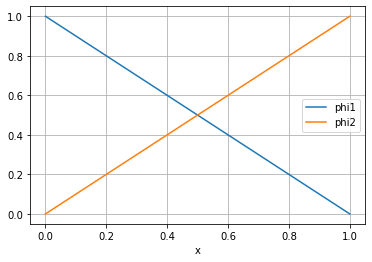

In [15]:
sym.var('x')
phi1 = 1-x
phi2 = x
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### Assume element length h and thus scaling with h 

In [13]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (xl-x)/(h)
phi2 = (x-xl-h)/(h)
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

contribution to the stiffness matrix
⎡ 1   -1 ⎤
⎢ ─   ───⎥
⎢ h    h ⎥
⎢        ⎥
⎢-1    1 ⎥
⎢───   ─ ⎥
⎣ h    h ⎦
contribution to the mass matrix
⎡h  h⎤
⎢─  ─⎥
⎢3  6⎥
⎢    ⎥
⎢h  h⎥
⎢─  ─⎥
⎣6  3⎦


(None, None)

## Section 2.2: One-Dimensional Quadratic Lagrange Shape Functions

### Assume element length 1 and thus no scaling with mesh width

contribution to the stiffness matrix
⎡2.33333333333333   -2.66666666666667  0.333333333333332⎤
⎢                                                       ⎥
⎢-2.66666666666667        16/3         -2.66666666666667⎥
⎢                                                       ⎥
⎣0.333333333333332  -2.66666666666667  2.33333333333333 ⎦
contribution to the mass matrix
⎡ 0.133333333333333   0.0666666666666673  -0.0333333333333332⎤
⎢                                                            ⎥
⎢0.0666666666666673          8/15         0.0666666666666667 ⎥
⎢                                                            ⎥
⎣-0.0333333333333332  0.0666666666666667   0.133333333333333 ⎦


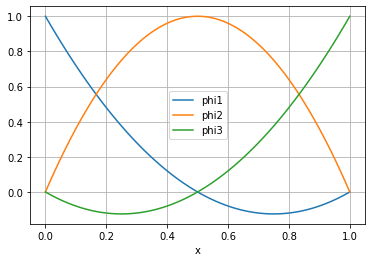

In [14]:
sym.var('x')
phi1 = 2*(1-x)*(0.5-x)
phi2 = 4*x*(1-x)
phi3 = 2*x*(x-0.5)
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)
phi3_lambda = sym.lambdify(x, phi3)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### Assume element length h and thus scaling with h

contribution to the stiffness matrix
⎡ 7   -8    1 ⎤
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢-8    16  -8 ⎥
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢ 1   -8    7 ⎥
⎢───  ───  ───⎥
⎣3⋅h  3⋅h  3⋅h⎦
contribution to the mass matrix
⎡2⋅h  h    -h ⎤
⎢───  ──   ───⎥
⎢ 15  15    30⎥
⎢             ⎥
⎢h    8⋅h  h  ⎥
⎢──   ───  ── ⎥
⎢15    15  15 ⎥
⎢             ⎥
⎢-h   h    2⋅h⎥
⎢───  ──   ───⎥
⎣ 30  15    15⎦


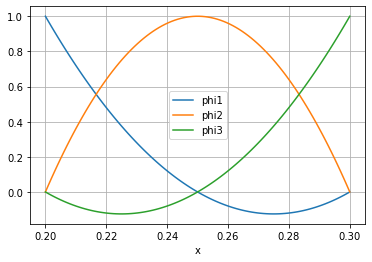

In [51]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (x-xl-h/2)*(x-xl-h)/(h*h/2)
phi2 = -(x-xl)*(x-xl-h)/(h*h/4)
phi3 = (x-xl)*(x-xl-h/2)/(h*h/2)
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify([x, xl, h], phi1)
phi2_lambda = sym.lambdify([x, xl, h], phi2)
phi3_lambda = sym.lambdify([x, xl, h], phi3)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xl = 0.2; h = 0.1 
xvec = np.linspace(xl,xl+h,nsamples)
phi1_vec = phi1_lambda(xvec,xl,h)
phi2_vec = phi2_lambda(xvec,xl,h)
phi3_vec = phi3_lambda(xvec,xl,h)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

## Section 3.2: One-Dimensional Cubic Hermite Shape Functions

contribution to the stiffness matrix
⎡3/5   -2/5  -3/5  -2/5⎤
⎢                      ⎥
⎢       23          23 ⎥
⎢-2/5   ──   2/5    ── ⎥
⎢       30          30 ⎥
⎢                      ⎥
⎢-3/5  2/5   3/5   2/5 ⎥
⎢                      ⎥
⎢       23          23 ⎥
⎢-2/5   ──   2/5    ── ⎥
⎣       30          30 ⎦
contribution to the mass matrix
⎡ 26    -103              ⎤
⎢ ──    ─────  9/35  1/105⎥
⎢ 35     210              ⎥
⎢                         ⎥
⎢-103    12    -37        ⎥
⎢─────   ──    ────  1/105⎥
⎢ 210    35    210        ⎥
⎢                         ⎥
⎢       -37     26     34 ⎥
⎢9/35   ────    ──    ─── ⎥
⎢       210     35    105 ⎥
⎢                         ⎥
⎢               34     37 ⎥
⎢1/105  1/105  ───    ─── ⎥
⎣              105    210 ⎦


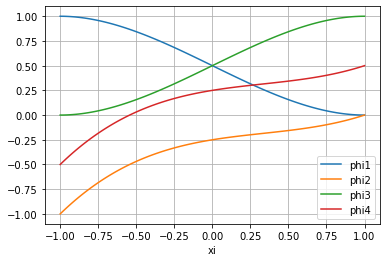

In [59]:
sym.var('xi')
phi1 = (2 - 3 * xi + pow(xi,3))/4
phi2 = (-1 + xi - pow(xi,2) + pow(xi,3))/4
phi3 = (2 + 3 * xi - pow(xi,3))/4
phi4 = (1 + xi - pow(xi,2) + pow(xi,3))/4
phi = sym.Matrix([phi1, phi2, phi3, phi4])
dphi = sym.diff(phi, xi)
A = sym.integrate(dphi*sym.Transpose(dphi), (xi, -1,1))
M = sym.integrate(phi*sym.Transpose(phi), (xi, -1,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(xi, phi1)
phi2_lambda = sym.lambdify(xi, phi2)
phi3_lambda = sym.lambdify(xi, phi3)
phi4_lambda = sym.lambdify(xi, phi4)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(-1,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)
phi4_vec = phi4_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.plot(xvec,phi4_vec,label='phi4')
plt.xlabel('xi')
plt.legend(loc='best')
plt.grid()
plt.show()